In [4]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [45]:
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150 #200
VALIDATION_STEPS = 25
BATCH_SIZE = 32
EPOCHS = 20 #25
STEPS_PER_EPOCH = 100

In [46]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [47]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

In [49]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [50]:
training_set = train_datagen.flow_from_directory('data/training_set',
                                                 target_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'binary')

Found 249 images belonging to 2 classes.


In [51]:
training_set.class_indices

{'matheus': 0, 'naiara': 1}

In [52]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [53]:
test_set = test_datagen.flow_from_directory('data/test_set',
                                            target_size = (IMAGE_WIDTH, IMAGE_HEIGHT),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'binary')

Found 82 images belonging to 2 classes.


In [54]:
classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set.filenames) // BATCH_SIZE, #STEPS_PER_EPOCH,
                         epochs = EPOCHS,
                         validation_data = test_set,
                         validation_steps = VALIDATION_STEPS)

Epoch 1/20
7/7 [==============================] - 40s 6s/step - loss: 0.9833 - acc: 0.4732 - val_loss: 0.6989 - val_acc: 0.5044
Epoch 2/20
7/7 [==============================] - 33s 5s/step - loss: 0.6846 - acc: 0.5398 - val_loss: 0.6888 - val_acc: 0.4797
Epoch 3/20
7/7 [==============================] - 33s 5s/step - loss: 0.6672 - acc: 0.5677 - val_loss: 0.6926 - val_acc: 0.5089
Epoch 4/20
7/7 [==============================] - 38s 5s/step - loss: 0.6366 - acc: 0.6115 - val_loss: 0.6757 - val_acc: 0.5233
Epoch 5/20
7/7 [==============================] - 32s 5s/step - loss: 0.5726 - acc: 0.6932 - val_loss: 0.6723 - val_acc: 0.5610
Epoch 6/20
7/7 [==============================] - 33s 5s/step - loss: 0.5750 - acc: 0.7123 - val_loss: 0.8372 - val_acc: 0.5223
Epoch 7/20
7/7 [==============================] - 32s 5s/step - loss: 0.5571 - acc: 0.7245 - val_loss: 0.7103 - val_acc: 0.6192
Epoch 8/20
7/7 [==============================] - 33s 5s/step - loss: 0.4749 - acc: 0.7996 - val_loss: 0

In [55]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 39200)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               5017728   
__________

In [56]:
classifier.evaluate_generator(generator=test_set, steps=validation_steps)

[0.8645152070148047, 0.6366279081896294]

In [57]:
loss, metric = classifier.evaluate_generator(generator=test_set, steps=validation_steps)

In [58]:
print('loss:', loss)
print('acc:', metric)

loss: 0.8769906212738784
acc: 0.6305637996345316


In [105]:
test = image.load_img('./data/single_prediction/matheus-naiara-03.jpg', target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))

In [106]:
test = image.img_to_array(test)
test = np.expand_dims(test, axis=0)

In [107]:
classes = classifier.predict_classes(test)

In [108]:
classes

array([[0]], dtype=int32)

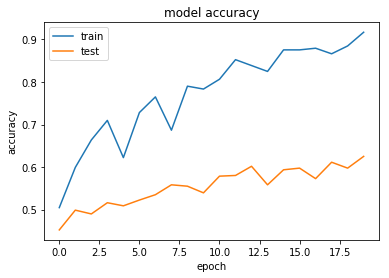

In [42]:
# ANTES
# summarize history for accuracy
plt.plot(classifier.history.history['acc'])
plt.plot(classifier.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

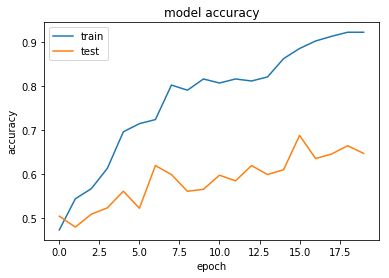

In [75]:
# DEPOIS
# summarize history for accuracy
plt.plot(classifier.history.history['acc'])
plt.plot(classifier.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

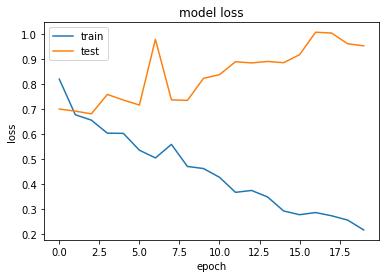

In [43]:
# ANTES
# summarize history for loss
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

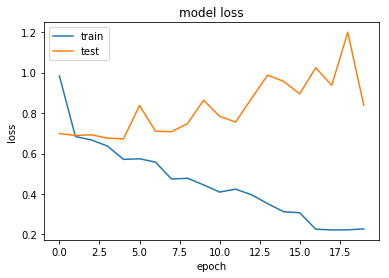

In [76]:
# DEPOIS
# summarize history for loss
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()